# **Proyek Machine Learning: Prediksi Customer Churn**  
**Nama**: Berlian Ishma Zhafira Sujana
**Cohort ID:**MC006D5X1352

##1. Import Library

In [ ]:
pip install kaggle

In [ ]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

##2. Data Understanding

### 2.1 Load Data

In [ ]:
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:
# Path ke file CSV dalam direktori input Kaggle
file_path = '/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Membaca dataset
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

###2.2 Exploratory Data Analysis (EDA)

Class Distribution (%):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


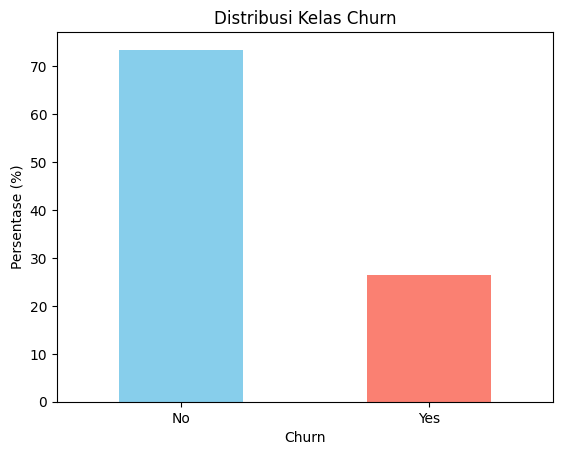

In [ ]:
import pandas as pd

# Hitung distribusi kelas
churn_distribution = df['Churn'].value_counts(normalize=True) * 100

# Tampilkan hasil
print("Class Distribution (%):")
print(churn_distribution)

# Visualisasi
import matplotlib.pyplot as plt
churn_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Kelas Churn')
plt.ylabel('Persentase (%)')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

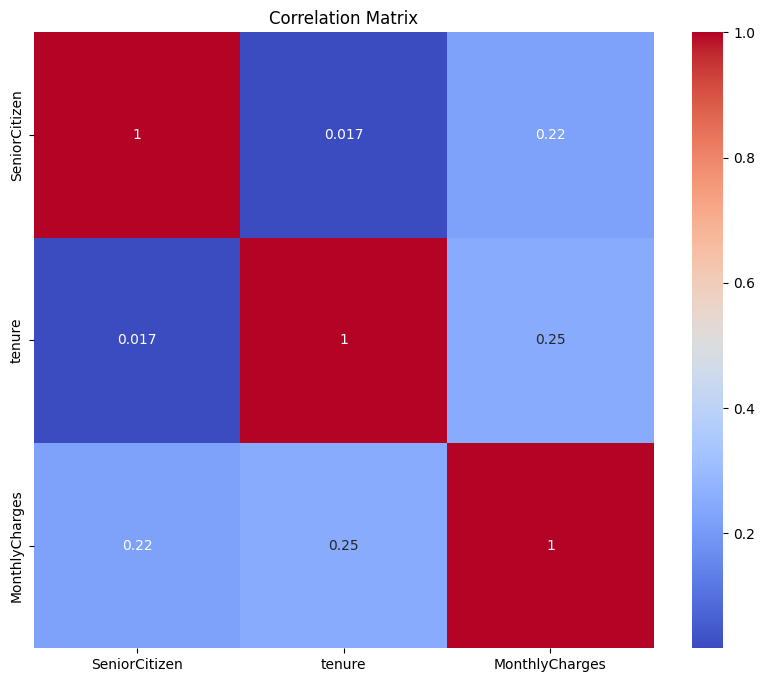

In [ ]:
# Visualisasi

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

Insight:
Dataset didominasi oleh kelas "No" (tidak churn) dengan persentase 73%, sementara kelas "Yes" (churn) hanya 27%. Dampaknya bisa jadi model cenderung bias memprediksi kelas mayoritas ("No") karena lebih sering muncul.

##3. Data Preparation  

###3.1 Handling Missing Values

In [ ]:
# Cek missing value
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Insight:
Muat dataset dari CSV. Diverifikasi tidak ada nilai yang hilang dengan df.isnull().sum().

###3.2 Feature Engineering

In [ ]:
# Encode fitur kategorikal
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

Insight:
Mengubah target kategoris menjadi biner untuk klasifikasi.

In [ ]:
# Pilih fitur numerik
numerical_features = ['tenure', 'MonthlyCharges']
X = df[numerical_features]
y = df['Churn']

Insight:
Memilih fitur-fitur ini berdasarkan EDA yang menunjukkan korelasi kuat dengan churn.

###3.3 Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##4. Modeling

###4.1 Pelatihan Model

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

###4.2 Prediksi & Evaluasi

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1036
           1       0.54      0.47      0.50       373

    accuracy                           0.75      1409
   macro avg       0.68      0.66      0.67      1409
weighted avg       0.75      0.75      0.75      1409

